In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('breast_cancer_data.csv')

In [3]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# Encode the diagnosis column (assuming it's the target variable 'y')
labelEncoder_Y = LabelEncoder()
df['diagnosis'] = labelEncoder_Y.fit_transform(df['diagnosis'])

# Split the data into features (x) and target variable (y)
x = df.iloc[:, 1:12]  # Assuming columns 1 to 11 are features
y = df['diagnosis']

# Split the data set into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(x_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 1.0


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, auc

In [12]:
# Compute and analyze the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix:
[[67  0]
 [ 0 47]]
Precision: 1.0
Recall: 1.0


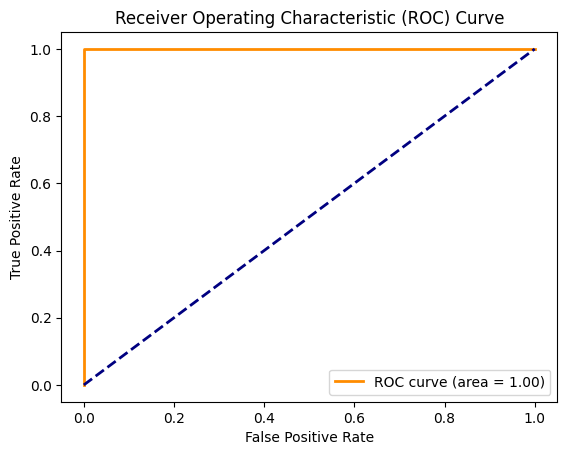

In [16]:
# Plot the ROC curve and calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [17]:
import joblib

# Save the trained model to a file using Joblib
joblib.dump(log_reg, 'logistic_regression_model.joblib')

print("Model saved successfully.")


Model saved successfully.
